In [ ]:
# Clone GFPGAN and enter the GFPGAN folder
%cd /content
!rm -rf GFPGAN
!git clone https://github.com/TencentARC/GFPGAN.git
%cd GFPGAN

# Set up the environment
# Install basicsr - https://github.com/xinntao/BasicSR
# We use BasicSR for both training and inference
!pip install basicsr
# Install facexlib - https://github.com/xinntao/facexlib
# We use face detection and face restoration helper in the facexlib package
!pip install facexlib
!pip install torchvision==0.16.0
!pip install torch==2.1.0
# Install other depencencies
!pip install -r requirements.txt
!python setup.py develop
!pip install realesrgan  # used for enhancing the background (non-face) regions
# Download the pre-trained model
# !wget https://github.com/TencentARC/GFPGAN/releases/download/v0.2.0/GFPGANCleanv1-NoCE-C2.pth -P experiments/pretrained_models
# Now we use the V1.3 model for the demo
!wget https://github.com/TencentARC/GFPGAN/releases/download/v1.3.0/GFPGANv1.3.pth -P experiments/pretrained_models

/content
Cloning into 'GFPGAN'...
remote: Enumerating objects: 523, done.
remote: Counting objects: 100% (210/210), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 523 (delta 168), reused 153 (delta 153), pack-reused 313
Receiving objects: 100% (523/523), 5.37 MiB | 23.32 MiB/s, done.
Resolving deltas: 100% (279/279), done.
/content/GFPGAN
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 32.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Us

# 2. Upload Images / Use the demo images

In [ ]:
# upload your own images

import os
from google.colab import files
import shutil

upload_folder = 'inputs/upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving images222.jpg to images222.jpg
Saving images111.jpg to images111.jpg
Saving before3.jpg to before3.jpg
move images222.jpg to inputs/upload/images222.jpg
move images111.jpg to inputs/upload/images111.jpg
move before3.jpg to inputs/upload/before3.jpg


### OR you can use the demo image by running the following codes

## 3. Inference

In [ ]:
# Now we use the GFPGAN to restore the above low-quality images
# We use [Real-ESRGAN](https://github.com/xinntao/Real-ESRGAN) for enhancing the background (non-face) regions
# You can find the different models in https://github.com/TencentARC/GFPGAN#european_castle-model-zoo
!rm -rf results
!python inference_gfpgan.py -i inputs/upload -o results -v 1.3 -s 2 --bg_upsampler realesrgan

# Usage: python inference_gfpgan.py -i inputs/whole_imgs -o results -v 1.3 -s 2 [options]...
#
#  -h                   show this help
#  -i input             Input image or folder. Default: inputs/whole_imgs
#  -o output            Output folder. Default: results
#  -v version           GFPGAN model version. Option: 1 | 1.2 | 1.3. Default: 1.3
#  -s upscale           The final upsampling scale of the image. Default: 2
#  -bg_upsampler        background upsampler. Default: realesrgan
#  -bg_tile             Tile size for background sampler, 0 for no tile during testing. Default: 400
#  -suffix              Suffix of the restored faces
#  -only_center_face    Only restore the center face
#  -aligned             Input are aligned faces
#  -ext                 Image extension. Options: auto | jpg | png, auto means using the same extension as inputs. Default: auto

!ls results/cmp

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Processing before3.jpg ...
	Tile 1/1
Processing images111.jpg ...
	Tile 1/1
Processing images222.jpg ...
	Tile 1/1
Results are

## 4. Visualize

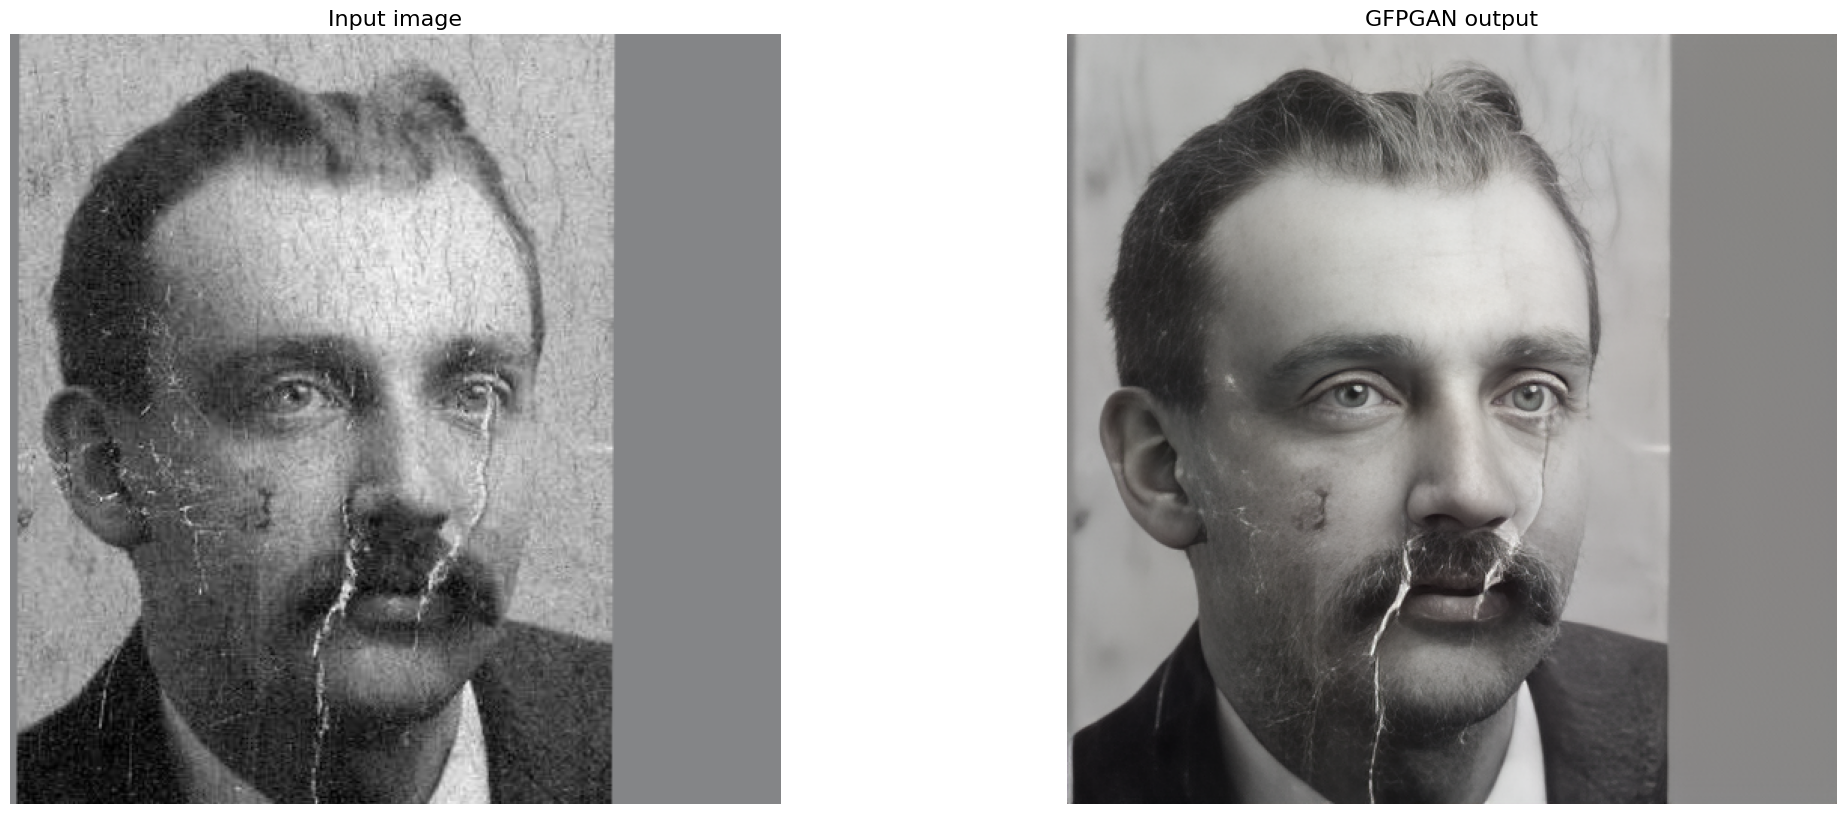

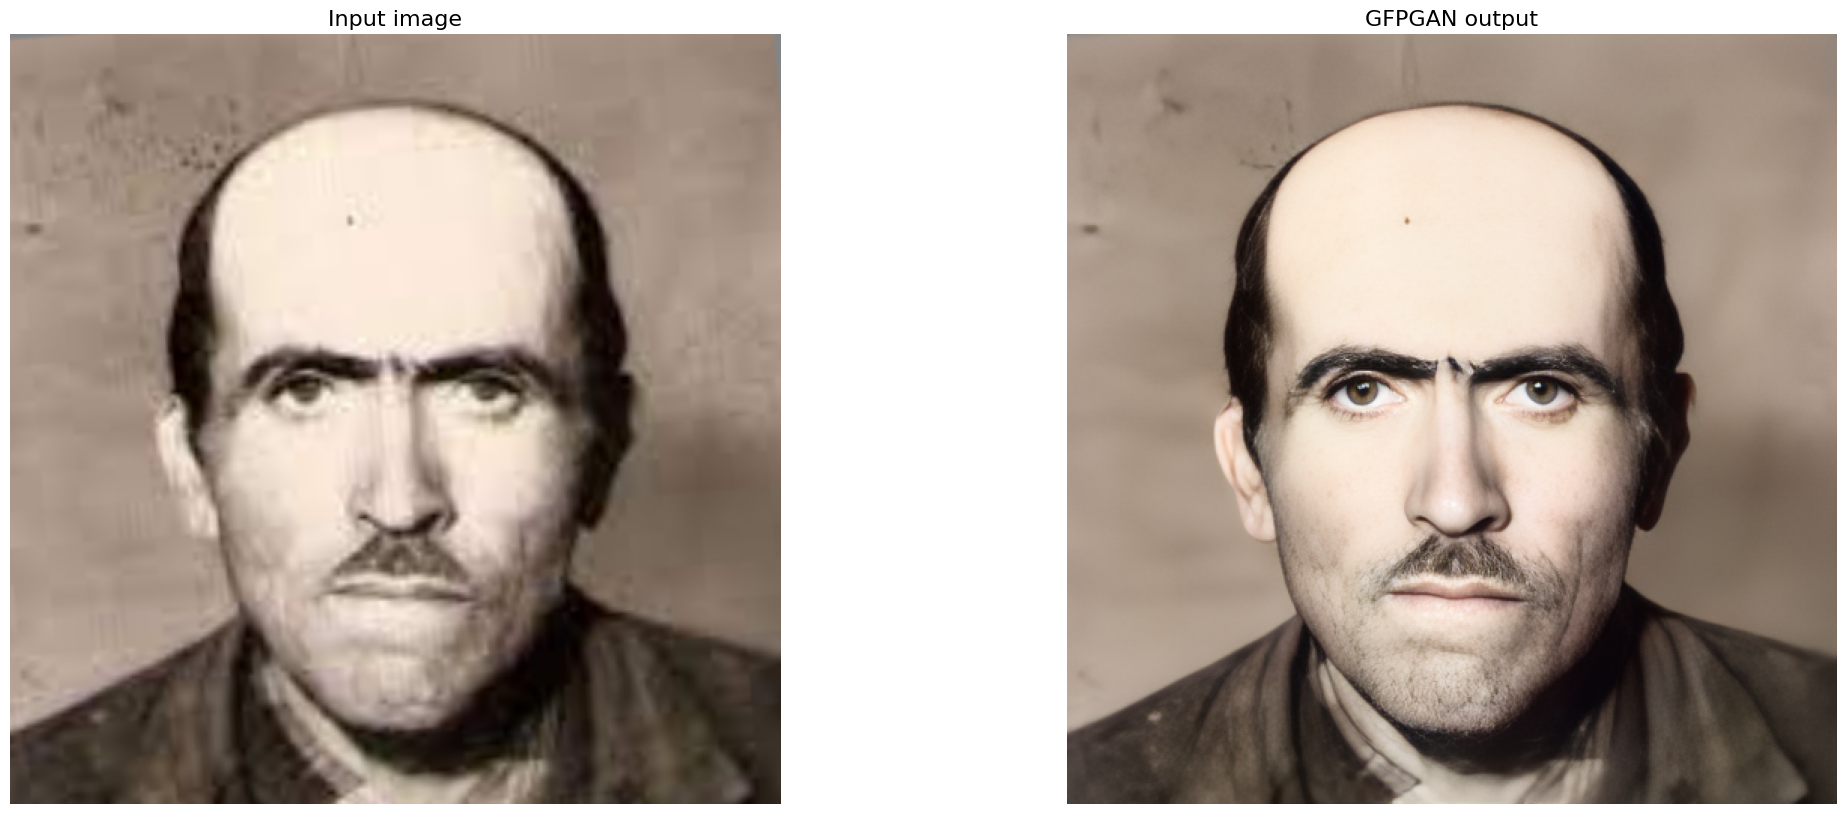

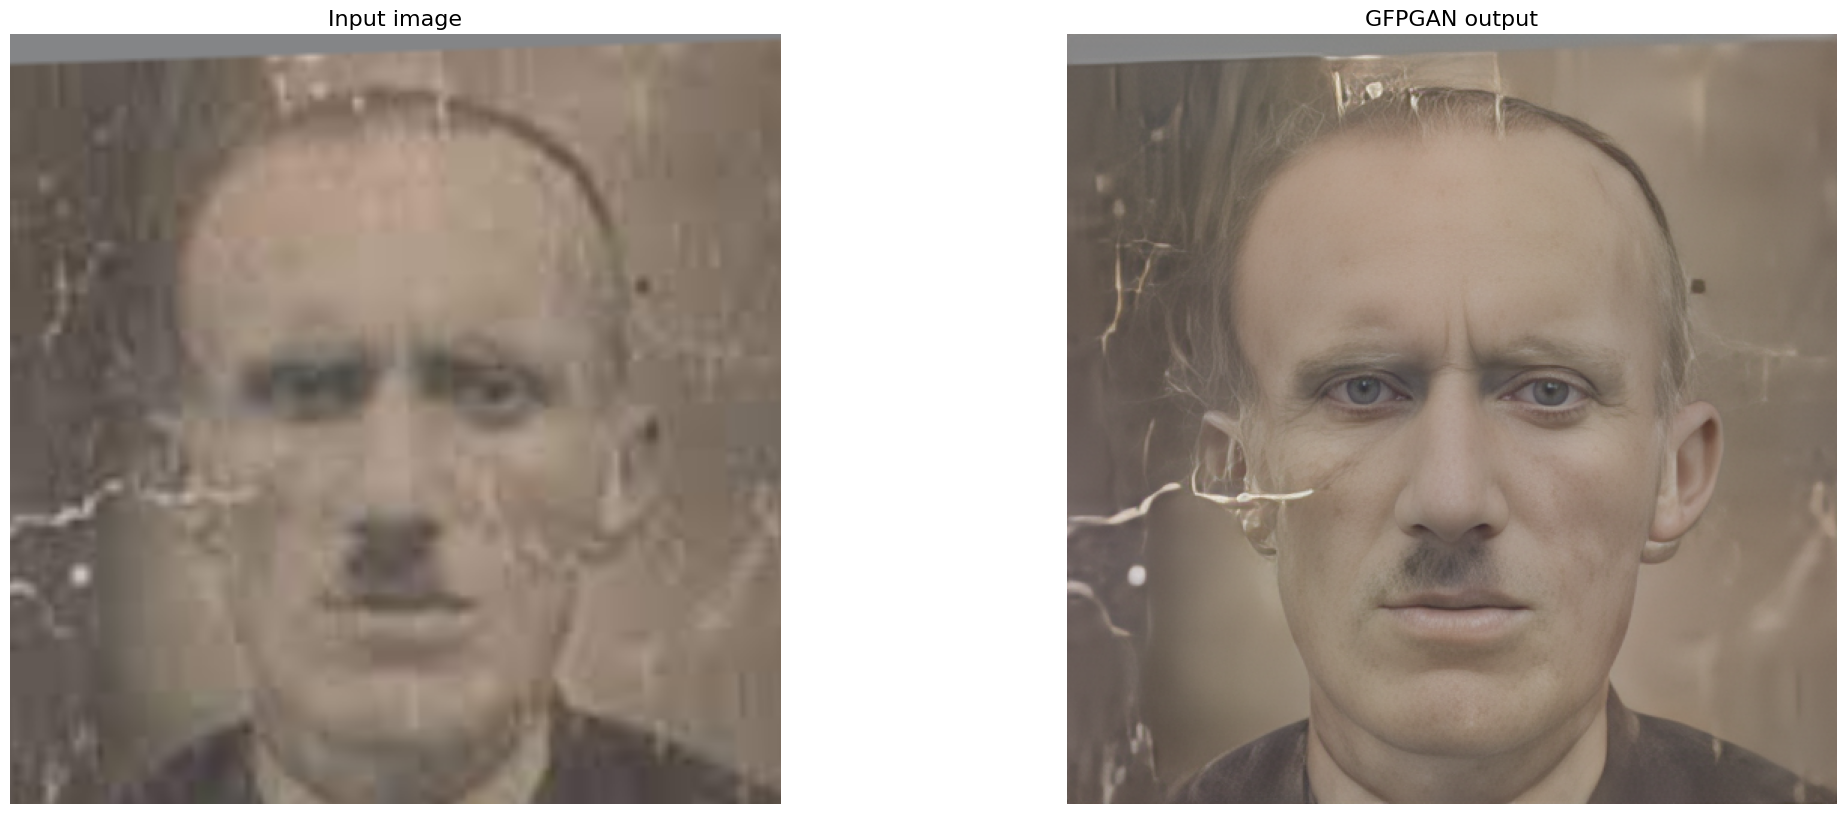

In [ ]:
# We first visualize the cropped faces
# The left are the inputs images; the right are the results of GFPGAN

import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1)
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('GFPGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'results/cropped_faces'
result_folder = 'results/restored_faces'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)


## 5. Download results

In [ ]:
# download the result
!ls results
print('Download results')
os.system('zip -r download.zip results')
files.download("download.zip")

cmp  cropped_faces  restored_faces  restored_imgs
Download results


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>